In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv('labor.csv')

# Variable Identification

In [3]:
data.head()

,duration,wage-increase-first-year,wage-increase-second-year,wage-increase-third-year,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan,class
0,1,5,?,?,?,40,?,?,2,?,11,average,?,?,yes,?,good
1,2,4.5,5.8,?,?,35,ret_allw,?,?,yes,11,below_average,?,full,?,full,good
2,?,?,?,?,?,38,empl_contr,?,5,?,11,generous,yes,half,yes,half,good
3,3,3.7,4,5,tc,?,?,?,?,yes,?,?,?,?,yes,?,good
4,3,4.5,4.5,5,?,40,?,?,?,?,12,average,?,half,yes,half,good


In [4]:
data.dtypes

duration                          object
wage-increase-first-year          object
wage-increase-second-year         object
wage-increase-third-year          object
cost-of-living-adjustment         object
working-hours                     object
pension                           object
standby-pay                       object
shift-differential                object
education-allowance               object
statutory-holidays                object
vacation                          object
longterm-disability-assistance    object
contribution-to-dental-plan       object
bereavement-assistance            object
contribution-to-health-plan       object
class                             object
dtype: object

In [5]:
data.count()

duration                          57
wage-increase-first-year          57
wage-increase-second-year         57
wage-increase-third-year          57
cost-of-living-adjustment         57
working-hours                     57
pension                           57
standby-pay                       57
shift-differential                57
education-allowance               57
statutory-holidays                57
vacation                          57
longterm-disability-assistance    57
contribution-to-dental-plan       57
bereavement-assistance            57
contribution-to-health-plan       57
class                             57
dtype: int64

In [6]:
data.describe()

,duration,wage-increase-first-year,wage-increase-second-year,wage-increase-third-year,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan,class
count,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
unique,4,18,16,10,4,9,4,8,11,3,7,4,3,4,3,4,2
top,2,2,4,?,none,40,?,?,?,?,11,below_average,?,?,yes,full,good
freq,27,10,13,42,22,23,30,48,26,35,21,18,29,20,27,20,37


# Data Cleaning


In [7]:
data[data=="?"].count()

duration                           1
wage-increase-first-year           1
wage-increase-second-year         11
wage-increase-third-year          42
cost-of-living-adjustment         20
working-hours                      6
pension                           30
standby-pay                       48
shift-differential                26
education-allowance               35
statutory-holidays                 4
vacation                           6
longterm-disability-assistance    29
contribution-to-dental-plan       20
bereavement-assistance            27
contribution-to-health-plan       20
class                              0
dtype: int64

In [8]:
data=data.replace(to_replace ="?",value =0)

In [9]:
data=data.drop(['wage-increase-third-year','pension','pension','standby-pay','shift-differential','education-allowance','longterm-disability-assistance','bereavement-assistance'],axis=1)

In [10]:
data.dtypes

duration                       object
wage-increase-first-year       object
wage-increase-second-year      object
cost-of-living-adjustment      object
working-hours                  object
statutory-holidays             object
vacation                       object
contribution-to-dental-plan    object
contribution-to-health-plan    object
class                          object
dtype: object

In [11]:
data[['wage-increase-first-year','wage-increase-second-year','working-hours','statutory-holidays']]=data[['wage-increase-first-year','wage-increase-second-year','working-hours','statutory-holidays']].apply(pd.to_numeric)

In [12]:
data.dtypes

duration                        object
wage-increase-first-year       float64
wage-increase-second-year      float64
cost-of-living-adjustment       object
working-hours                    int64
statutory-holidays               int64
vacation                        object
contribution-to-dental-plan     object
contribution-to-health-plan     object
class                           object
dtype: object

In [13]:
data.describe()

,wage-increase-first-year,wage-increase-second-year,working-hours,statutory-holidays
count,57.000000,57.000000,57.000000,57.000000
mean,3.736842,3.205263,34.035088,10.315789
std,1.448723,1.894581,12.013333,3.106203
min,0.000000,0.000000,0.000000,0.000000
25%,2.500000,2.500000,35.000000,10.000000
50%,4.000000,4.000000,38.000000,11.000000
75%,4.500000,4.500000,40.000000,12.000000
max,7.000000,7.000000,40.000000,15.000000


In [14]:
data=data.replace(0,np.nan)

In [15]:
data.isnull().sum()

duration                        1
wage-increase-first-year        1
wage-increase-second-year      11
cost-of-living-adjustment      20
working-hours                   6
statutory-holidays              4
vacation                        6
contribution-to-dental-plan    20
contribution-to-health-plan    20
class                           0
dtype: int64

In [16]:
data['cost-of-living-adjustment'].fillna(method='ffill',inplace=True)

In [17]:
data['contribution-to-dental-plan'].fillna(method='ffill',inplace=True)

In [18]:
data['contribution-to-health-plan'].fillna(method='ffill',inplace=True)

In [19]:
data.isnull().sum()

duration                        1
wage-increase-first-year        1
wage-increase-second-year      11
cost-of-living-adjustment       3
working-hours                   6
statutory-holidays              4
vacation                        6
contribution-to-dental-plan     1
contribution-to-health-plan     1
class                           0
dtype: int64

In [20]:
data.dropna(inplace=True) # dropping all the columns with null values

In [21]:
data.isnull().sum()

duration                       0
wage-increase-first-year       0
wage-increase-second-year      0
cost-of-living-adjustment      0
working-hours                  0
statutory-holidays             0
vacation                       0
contribution-to-dental-plan    0
contribution-to-health-plan    0
class                          0
dtype: int64

# Visualization

In [22]:
data.dtypes

duration                        object
wage-increase-first-year       float64
wage-increase-second-year      float64
cost-of-living-adjustment       object
working-hours                  float64
statutory-holidays             float64
vacation                        object
contribution-to-dental-plan     object
contribution-to-health-plan     object
class                           object
dtype: object

<AxesSubplot:ylabel='wage-increase-first-year'>

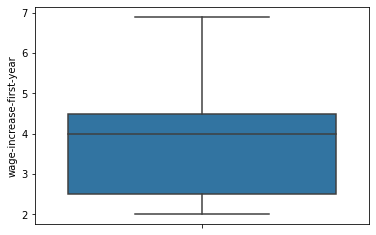

In [23]:
sns.boxplot(y='wage-increase-first-year',data=data)

<AxesSubplot:ylabel='wage-increase-second-year'>

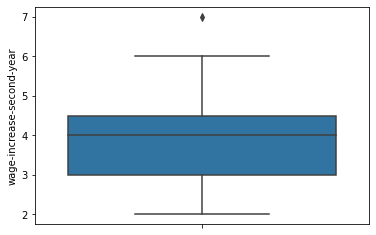

In [24]:
sns.boxplot(y='wage-increase-second-year',data=data)

<AxesSubplot:ylabel='statutory-holidays'>

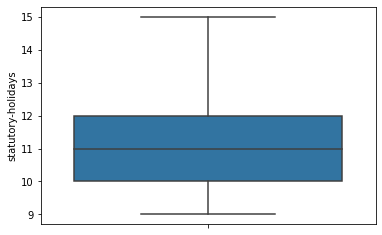

In [25]:
sns.boxplot(y='statutory-holidays',data=data)

<AxesSubplot:>

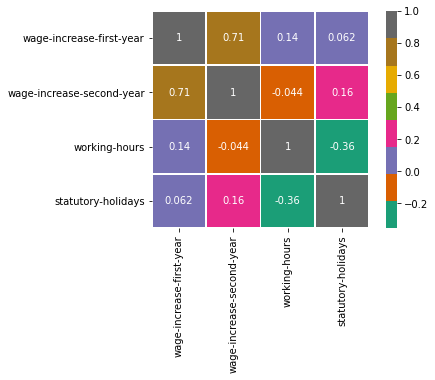

In [26]:
cr=data[['wage-increase-first-year','wage-increase-second-year','working-hours','statutory-holidays']].corr()
sns.heatmap(cr,square=True,annot=True,cmap='Dark2',linewidth=0.9)

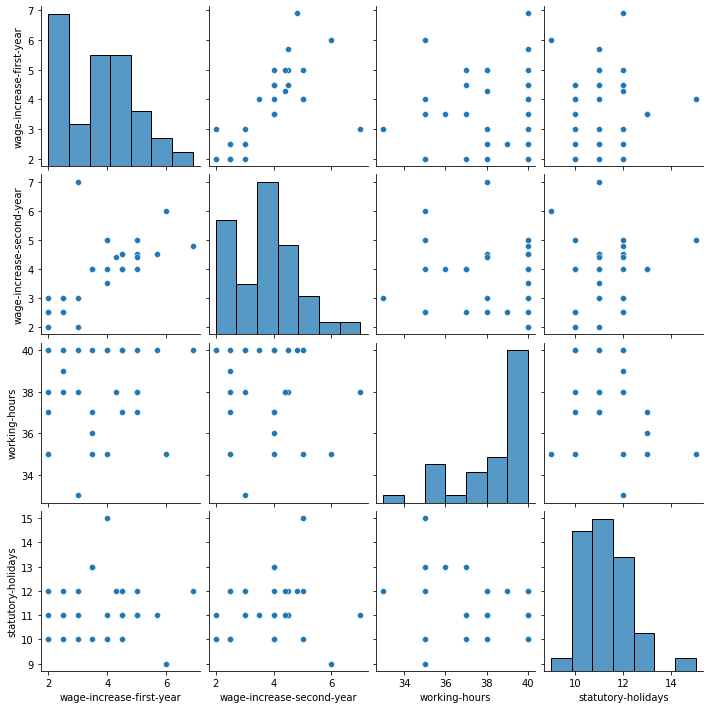

In [27]:
cdata=data[['wage-increase-first-year','wage-increase-second-year','working-hours','statutory-holidays']]
sns.pairplot(cdata)

<AxesSubplot:xlabel='cost-of-living-adjustment'>

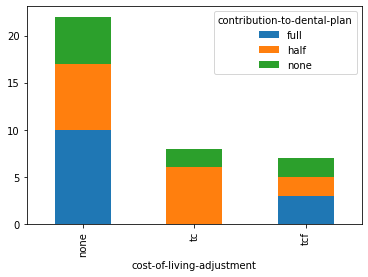

In [28]:
pd.crosstab(data['cost-of-living-adjustment'],data['contribution-to-dental-plan']).plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='cost-of-living-adjustment'>

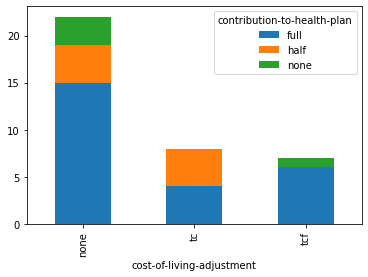

In [29]:
pd.crosstab(data['cost-of-living-adjustment'],data['contribution-to-health-plan']).plot(kind='bar',stacked=True)

In [64]:
data.head()


,duration,wage-increase-first-year,wage-increase-second-year,cost-of-living-adjustment,working-hours,statutory-holidays,vacation,contribution-to-dental-plan,contribution-to-health-plan,class
4,3,4.5,4.5,tc,40.0,12.0,average,half,half,good
5,2,2.0,2.5,tc,35.0,12.0,average,half,half,good
7,3,6.9,4.8,tc,40.0,12.0,below_average,none,half,good
8,2,3.0,7.0,tc,38.0,11.0,below_average,half,half,good
10,3,3.5,4.0,none,36.0,13.0,generous,full,full,good


# Dummy variable creation

In [30]:
obj=data.iloc[:,:9].dtypes== np.object
obj

duration                        True
wage-increase-first-year       False
wage-increase-second-year      False
cost-of-living-adjustment       True
working-hours                  False
statutory-holidays             False
vacation                        True
contribution-to-dental-plan     True
contribution-to-health-plan     True
dtype: bool

In [31]:
obj=['cost-of-living-adjustment','vacation','contribution-to-dental-plan','contribution-to-health-plan']


In [32]:
dummydf=pd.DataFrame()
for i in obj:
    dummy=pd.get_dummies(data[i],drop_first=True )
    dummydf=pd.concat([dummydf, dummy], axis=1) 
print(dummydf)


    tc  tcf  below_average  generous  half  none  half  none
4    1    0              0         0     1     0     1     0
5    1    0              0         0     1     0     1     0
7    1    0              1         0     0     1     1     0
8    1    0              1         0     1     0     1     0
10   0    0              0         1     0     0     0     0
12   0    0              1         0     1     0     1     0
13   0    1              0         1     0     0     0     0
15   0    0              0         0     0     0     0     0
19   0    1              0         1     0     1     0     1
20   0    1              0         1     0     0     0     0
21   0    1              1         0     0     0     0     0
23   0    1              0         1     1     0     0     0
25   0    0              1         0     1     0     0     0
27   0    0              0         1     0     1     0     0
28   0    0              1         0     0     0     0     0
29   0    0             

In [33]:
data1=pd.concat([data,dummydf],axis=1)
data1.head()

,duration,wage-increase-first-year,wage-increase-second-year,cost-of-living-adjustment,working-hours,statutory-holidays,vacation,contribution-to-dental-plan,contribution-to-health-plan,class,tc,tcf,below_average,generous,half,none,half,none
4,3,4.5,4.5,tc,40.0,12.0,average,half,half,good,1,0,0,0,1,0,1,0
5,2,2.0,2.5,tc,35.0,12.0,average,half,half,good,1,0,0,0,1,0,1,0
7,3,6.9,4.8,tc,40.0,12.0,below_average,none,half,good,1,0,1,0,0,1,1,0
8,2,3.0,7.0,tc,38.0,11.0,below_average,half,half,good,1,0,1,0,1,0,1,0
10,3,3.5,4.0,none,36.0,13.0,generous,full,full,good,0,0,0,1,0,0,0,0


In [34]:
data1.drop(obj,axis=1,inplace=True)
data1.head()

,duration,wage-increase-first-year,wage-increase-second-year,working-hours,statutory-holidays,class,tc,tcf,below_average,generous,half,none,half,none
4,3,4.5,4.5,40.0,12.0,good,1,0,0,0,1,0,1,0
5,2,2.0,2.5,35.0,12.0,good,1,0,0,0,1,0,1,0
7,3,6.9,4.8,40.0,12.0,good,1,0,1,0,0,1,1,0
8,2,3.0,7.0,38.0,11.0,good,1,0,1,0,1,0,1,0
10,3,3.5,4.0,36.0,13.0,good,0,0,0,1,0,0,0,0


# Decision Tree on Labor Dataset

In [35]:
data1.head()

,duration,wage-increase-first-year,wage-increase-second-year,working-hours,statutory-holidays,class,tc,tcf,below_average,generous,half,none,half,none
4,3,4.5,4.5,40.0,12.0,good,1,0,0,0,1,0,1,0
5,2,2.0,2.5,35.0,12.0,good,1,0,0,0,1,0,1,0
7,3,6.9,4.8,40.0,12.0,good,1,0,1,0,0,1,1,0
8,2,3.0,7.0,38.0,11.0,good,1,0,1,0,1,0,1,0
10,3,3.5,4.0,36.0,13.0,good,0,0,0,1,0,0,0,0


In [56]:
X=data1.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,13]].values
X.shape

(37, 13)

In [37]:
y=data1.iloc[:,[5]]
y.shape

(37, 1)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree by using Gini Index

In [40]:
clf=DecisionTreeClassifier(criterion='gini')

In [41]:
clf=clf.fit(X_train,y_train)

In [42]:
y_pred=clf.predict(X_test)
y_pred

array(['bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good'], dtype=object)

In [43]:
from sklearn import metrics
print("Accuracy",round(metrics.accuracy_score(y_test,y_pred)*100,2))

Accuracy 91.67


In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[5, 1],
       [0, 6]], dtype=int64)

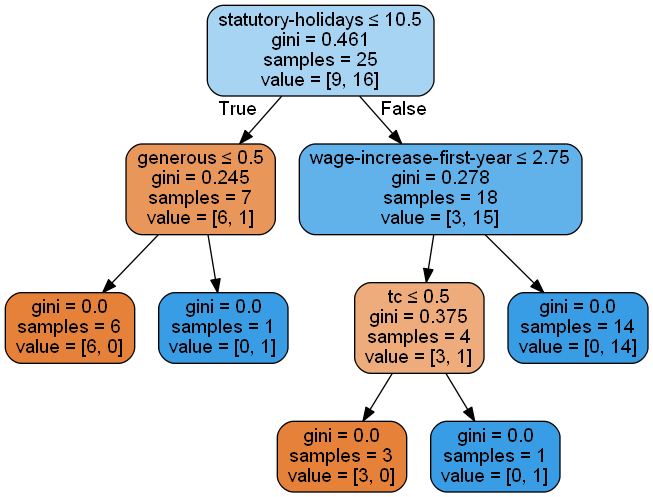

In [60]:
feature_cols=['duration','wage-increase-first-year','wage-increase-second-year','working-hours','statutory-holidays','tc','tcf','below_average','generous','half','none','half','none']
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=12000, height=12000)

# Decision Tree Using Information Gain

In [46]:
clf1=DecisionTreeClassifier(criterion='entropy')

In [47]:
clf1=clf1.fit(X_train,y_train)

In [48]:
y_pred1=clf1.predict(X_test)
y_pred1

array(['good', 'bad', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good'], dtype=object)

In [49]:
print("Accuracy",round(metrics.accuracy_score(y_test,y_pred1)*100,2))

Accuracy 75.0


In [50]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1)
cm

array([[3, 3],
       [0, 6]], dtype=int64)

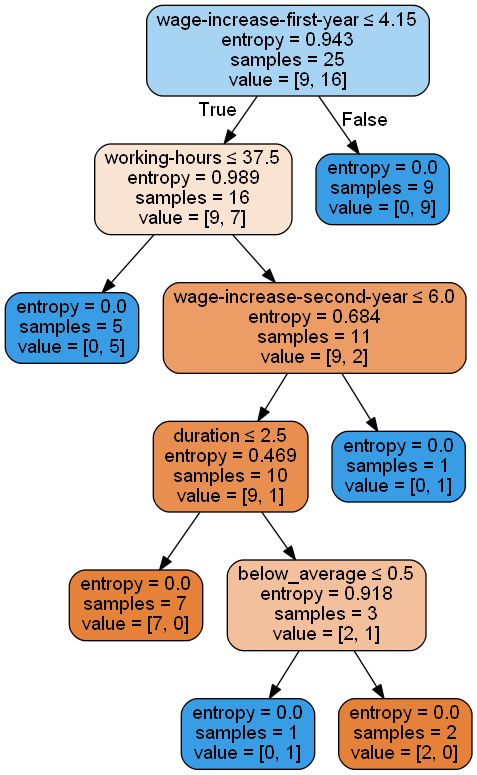

In [61]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=12000, height=12000)